In [1]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, matplotlib.font_manager as fm, os
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
font_family = 'DejaVu Sans'
title_font = fm.FontProperties(family=font_family, style='normal', size=20, weight='normal', stretch='normal')

In [3]:
save_folder = 'images_2'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [4]:
# define the initial system state (aka x, y, z positions in space)
initial_state = [0.1, 0, 0]

# define the system parameters sigma, rho, and beta
sigma = 10.
rho   = 99.96
beta  = 8./3.

# define the time points to solve for, evenly spaced between the start and end times
start_time = 0
end_time = 100
time_points = np.linspace(start_time, end_time, end_time*100)



In [5]:
# define the lorenz system
# x, y, and z make up the system state, t is time, and sigma, rho, beta are the system parameters
def lorenz_system(current_state, t):
    
    # positions of x, y, z in space at the current time point
    x, y, z = current_state
    
    # define the 3 ordinary differential equations known as the lorenz equations
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    
    # return a list of the equations that describe the system
    return [dx_dt, dy_dt, dz_dt]

In [6]:
# use odeint() to solve a system of ordinary differential equations
# the arguments are: 
# 1, a function - computes the derivatives
# 2, a vector of initial system conditions (aka x, y, z positions in space)
# 3, a sequence of time points to solve for
# returns an array of x, y, and z value arrays for each time point, with the initial values in the first row
xyz = odeint(lorenz_system, initial_state, time_points)

# extract the individual arrays of x, y, and z values from the array of arrays
x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

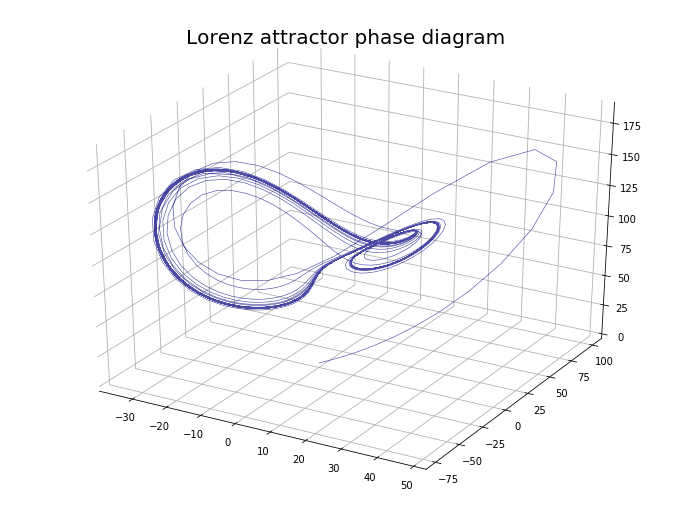

In [7]:
# plot the lorenz attractor in three-dimensional phase space
fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
ax.plot(x, y, z, color='navy', alpha=0.7, linewidth=0.6)
ax.set_title('Lorenz attractor phase diagram', fontproperties=title_font)

fig.savefig('{}/lorenz-attractor-3d.png'.format(save_folder), dpi=180, bbox_inches='tight')
plt.show()

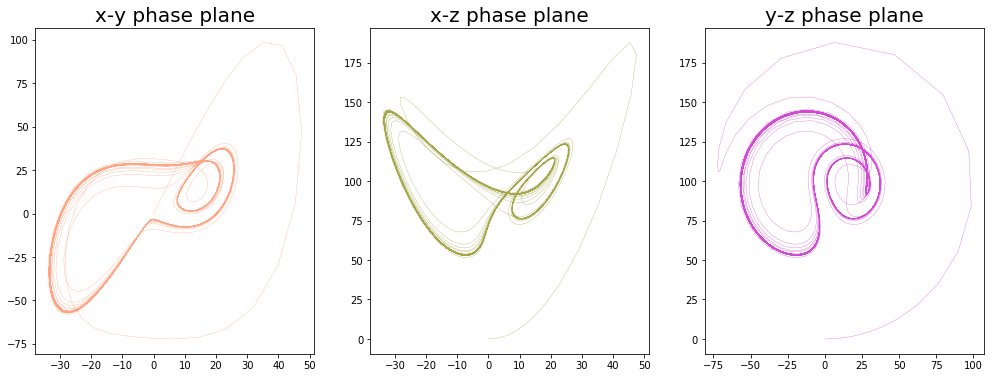

In [8]:
# now plot two-dimensional cuts of the three-dimensional phase space
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(17, 6))

# plot the x values vs the y values
ax[0].plot(x, y, color='coral', alpha=0.7, linewidth=0.3)
ax[0].set_title('x-y phase plane', fontproperties=title_font)

# plot the x values vs the z values
ax[1].plot(x, z, color='olive', alpha=0.7, linewidth=0.3)
ax[1].set_title('x-z phase plane', fontproperties=title_font)

# plot the y values vs the z values
ax[2].plot(y, z, color='m', alpha=0.7, linewidth=0.3)
ax[2].set_title('y-z phase plane', fontproperties=title_font)

fig.savefig('{}/lorenz-attractor-phase-plane.png'.format(save_folder), dpi=180, bbox_inches='tight')
plt.show()



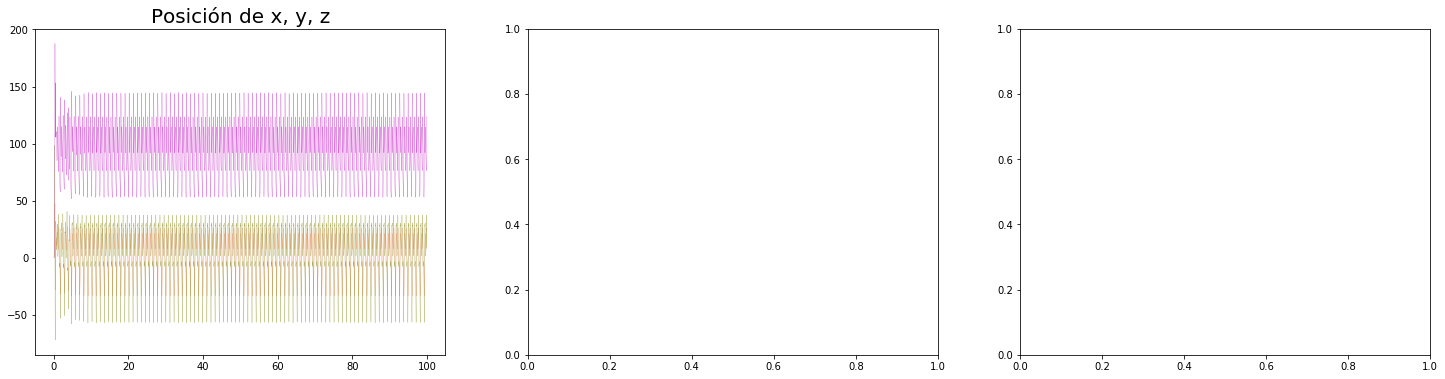

In [9]:
# now plot two-dimensional cuts of the three-dimensional phase space
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(25, 6))

# plot the x values vs the y values
ax[0].plot(time_points,x , color='coral', alpha=0.7, linewidth=0.3)

# plot the x values vs the z values
ax[0].plot(time_points,y,  color='olive', alpha=0.7, linewidth=0.3)

# plot the y values vs the z values
ax[0].plot(time_points,z, color='m', alpha=0.7, linewidth=0.3)

ax[0].set_title('Posición de x, y, z', fontproperties=title_font)

fig.savefig('{}/lorenz-attractor.png'.format(save_folder), dpi=180, bbox_inches='tight')
plt.show()


In [10]:
#Animación
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, glob, os
import IPython.display as IPdisplay, matplotlib.font_manager as fm
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D
from PIL import Image

In [11]:
# define the fonts to use for plots
family = 'DejaVu Sans'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')

In [12]:
save_folder = 'images_2/lorenz-animate'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [13]:
# define the initial system state (aka x, y, z positions in space)
initial_state = [0.1, 0, 0]

# define the system parameters sigma, rho, and beta
sigma = 10.
rho   = 99.96
beta  = 8./3.

# define the time points to solve for, evenly spaced between the start and end times
start_time = 1
end_time = 60
interval = 100
time_points = np.linspace(start_time, end_time, end_time * interval)

In [14]:
# define the lorenz system
def lorenz_system(current_state, t):
    x, y, z = current_state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

In [15]:
# plot the system in 3 dimensions
def plot_lorenz(xyz, n):
    fig = plt.figure(figsize=(12, 9))
    ax = fig.gca(projection='3d')
    ax.xaxis.set_pane_color((1,1,1,1))
    ax.yaxis.set_pane_color((1,1,1,1))
    ax.zaxis.set_pane_color((1,1,1,1))
    x = xyz[:, 0]
    y = xyz[:, 1]
    z = xyz[:, 2]
    ax.plot(x, y, z, color='navy', alpha=0.7, linewidth=0.7)
    ax.set_xlim((-30,50))
    ax.set_ylim((-75,100))
    ax.set_zlim((0,175))
    ax.set_title('Lorenz system attractor', fontproperties=title_font)
    
    plt.savefig('{}/{:03d}.png'.format(save_folder, n), dpi=60, bbox_inches='tight', pad_inches=0.1)
    plt.close()


In [16]:
# return a list in iteratively larger chunks
def get_chunks(full_list, size):
    size = max(1, size)
    chunks = [full_list[0:i] for i in range(1, len(full_list) + 1, size)]
    return chunks

In [17]:
# get incrementally larger chunks of the time points, to reveal the attractor one frame at a time
chunks = get_chunks(time_points, size=20)

In [18]:
# get the points to plot, one chunk of time steps at a time, by integrating the system of equations
points = [odeint(lorenz_system, initial_state, chunk) for chunk in chunks]

In [19]:
# plot each set of points, one at a time, saving each plot
for n, point in enumerate(points):
    plot_lorenz(point, n)

In [20]:
# create a tuple of display durations, one for each frame
first_last = 100 #show the first and last frames for 100 ms
standard_duration = 5 #show all other frames for 5 ms
durations = tuple([first_last] + [standard_duration] * (len(points) - 2) + [first_last])

In [21]:
# load all the static images into a list
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(save_folder))]
gif_filepath = 'images_2/animated-lorenz-attractor.gif'

In [22]:
# save as an animated gif
gif = images[0]
gif.info['duration'] = durations #ms per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])

In [23]:
# verify that the number of frames in the gif equals the number of image files and durations
Image.open(gif_filepath).n_frames == len(images) == len(durations)

False

In [24]:
IPdisplay.Image(url=gif_filepath)